随机变量是指根据概率取值的变量，在讨论随机变量时，我们通常用概率分布来描述他们，即随机变量出现每一个值的概率。经典的随机变量例子就是掷骰子，其出现从1到6的各个数字的概率是相等的。

我们把随机变量划分为两类：
* 离散型随机变量
* 连续型随机变量

尽管这两种类型的随机变量处理方式有所不同，但是它们背后的原则是殊途同归的。在处理金融领域问题时，我们能很容易看到利用随机变量进行建模是如何起作用的。金融资产通常表示为根据确定性和随机模式进行移动，随机模式则用随机变量来表示。具体来说，我们将在每一个时间步长对随机变量进行采样，然后将金融工具移动相应的数值。之所以这样分析，是因为资产中的大部分波动无法用确定性模型来解释。

每一个随机变量都服从一个用来描述它的概率分布函数。这个概率分布赋予了随机变量所有可能的值所对应的概率。对于一个给定的随机变量 $X$, 我们用$P(X = x)$来表示随机变量$X$等于某一个具体值$x$的概率。对于离散型随机变量，可以简写为$p(x)$用来表示$P(X = x)$。它也被称为概率质量函数($PMF$)。对于连续型随机变量，我们不能使用概率质量函数，而是会用概率密度函数（$PDF$），我们将在之后详细说明。概率分布是Black-Scholes模型、二项式定价模型以及资产资本定价模型（$CAPM$）的基础。理解它们，将会对未来进行蒙特卡罗模拟很有必要。

对于每一个概率分布函数，都会有一个与之对应的累计分布函数（$CDF$），记作$P(X \leq x)$，表示随机变量小于等于指定值x的概率。$CDF$的简写是$F(x) = P(X \leq x)$。为了求解离散型随机变量的累计分布值$F(x)$，我们首先通过概率质量函数得到每一个小于等于$x$的结果对应的概率，然后进行加总。

## 离散型随机变量
离散型随机变量是指变量具有有限可数的结果集，其中每个结果都有一个单独的概率。例如掷硬币或者掷骰子，它们是最经典的均匀分布的随机变量。掷硬币会得到正面或反面两种可能的结果，发生的概率都是$1/2$。然而，离散型随机变量对于结果集中的各个结果并不一定总是等权重（等概率）的。离散型随机变量的基本单位是它的**概率质量函数PMF** （如前面所述，PMF是概率函数$p(x)$的另一个名称），函数针对概率分布域中的每个可能的结果，给出一个对应的概率、质量。概率函数有两个主要的特性：
1. 随机变量X各个可能的结果，发生的概率p(x)都在$[0, 1]$的区间内
2. 随机变量X各个可能的结果，它们发生的各自概率p(x)之和等于1。

这里我们将给出一些最普遍的离散型概率分布的例子。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from __future__ import division

class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

### 离散型随机变量下的均匀分布
均匀分布是最经典的概率分布。在该分布下，所有可能出现的结果都是等权重的。拿掷骰子来说，出现每一个面的可能性都是$1/6$。因此对于这个均匀随机变量$X$的所有值来说，它的概率质量函数一定为$p(x) = 1/6$

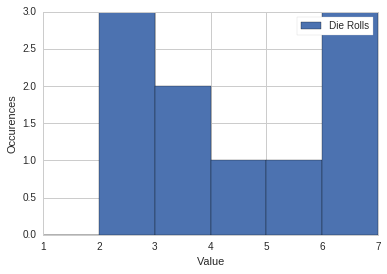

In [3]:
DieRolls = DiscreteRandomVariable(1, 7)
plt.figure(figsize=(6,4))
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);


当投掷的次数很少时，每个面出现的概率可能是不均匀的，但是当进行了大量的投掷后，得到每个面的几率是相同的。

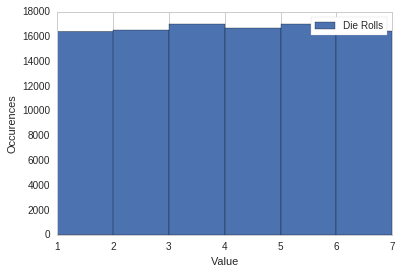

In [4]:
plt.figure(figsize=(6,4))
plt.hist(DieRolls.draw(100000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

因此通过掷骰子，我们能够解释对于随机变量$X$，它的各个值出现的概率$p(x) = 1/6$。让我们来结合概率函数和累计分布函数看一下随机变量各个值的可能性。

Value: $X = x$ | PMF: $p(x) = P(X = x)$ | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | 
1 | $1/6$ | $1/6$
2 | $1/6$ | $1/3$
3 | $1/6$ | $1/2$
4 | $1/6$ | $2/3$
5 | $1/6$ | $5/6$
6 | $1/6$ | $1$

通过这张表，我们能够方便地发现，概率函数满足离散型随机变量的特性。第一、概率函数中的每一个值都介于$[0,1]$的区间内；第二、概率函数所有值的总和为1，这能够在累积分布函数中得到证实。累计分布函数拥有以下两个属性：

1. 对于累计分布函数中所有的$x$，对应的函数值都介于$0$ 和 $1$之间。这与概率分布函数一样。
2. 累计分布函数不随$x$递减。也就是说，随$x$增大时，累计分布函数值要么增大，要么保持不变。

当尝试对其他概率分布进行抽样时，我们可以使用服从某个函数的均匀分布的组合来得到合适的样本。然而，这种方法效率很低。因此，我们将对每种分布都使用NumPy内建的函数来简化问题。

### 二项分布

二项分布被用来表示“成功”和“失败”。这在投资环境中是非常有用的，因为我们面临的许多选择都是像这样的二元选择。当我们进行一次成/败试验，我们称它为伯努利试验。对于伯努利试验，会有两种可能的结果：

$$p(1) = P(Y = 1) = p \ \ \ \ \ \ \
p(0) = P(Y = 0) = 1-p$$

这里我们把$Y$的值取$1$时表示成功，同时把一次试验中成功的概率记作$p$。

**二项分布是进行一组$n$次伯努利试验，我们可能从中得到$0$次 到 $n$次成功的不同情况。每次实验中成功的概率都是一样的，为$p$，并且所有的试验之间都是相互独立的。**我们只需要使用 $n$ 和 $p$就能描述整个二项随机变量，记作$X$ **~** $B(n, p)$。它表示$X$是一个参数为$n$ 和 $p$的二项随机变量。

为了定义二项随机变量的概率函数，我们必须能够从总的试验次数中挑出一些成功的次数。这种方法源自组合学中的排列组合。组合是指从集合中选出所要求的项目的所有可能的情况，无关乎被选出项目之间的顺序。举个例子，如果我们有6双袜子，并且想要从中选出2双，我们把所有可能的组合的数量记为$\binom{6}{2}$，具体情况如下：

$$\binom{6}{2} = \frac{6!}{4! \ 2!} = 15$$

这里 $!$ 表示阶乘，$n! = (n)(n-1)(n-2)\ldots (1)$。更进一步地，我们写出排列组合的通用公式：

$$\binom{n}{x} = \frac{n!}{(n-x)! \ x!}$$

我们用以上表达式来表示我们的二项随机变量试验成功的次数。组合是用来是计算总共有多少种不同的方法，能够得到同一个结果。由此概率函数定义为：

$$p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}$$

这里 $X$ 是一个具有$B(n, p)$分布的二项随机变量。

In [5]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

拿股票来说，股价上涨和下跌的概率各为50%，我们用上涨代表“成功”，记作$U$；同时把下跌代表“失败”，记作$D$。这样，我们能够用二项随机变量来分析每一次事件的概率。接下来我们考虑$n$的值为5的情况，即取5次股价的波动作为观察值，下表显示了每一次事件的概率：

Number of Up moves, $x$ | Ways of reaching $x$ Up moves $\binom{n}{x}$ | Independent Trials with $p = 0.50$ | $p(x)$ Value | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | --- | --- | 
$0$ | $1$ | $0.50^0 (1 - 0.50)^5 = 0.03125$ | $0.03125$ | $0.03125$
$1$ | $5$ | $0.50^1 (1 - 0.50)^4 = 0.03125$ | $0.15635$ | $0.18750$
$2$ | $10$ | $0.50^2 (1 - 0.50)^3 = 0.03125$ | $0.31250$ | $0.50000$
$3$ | $10$ | $0.50^3 (1 - 0.50)^2 = 0.03125$ | $0.31250$ | $0.81250$
$4$ | $5$ | $0.50^4 (1 - 0.50)^1 = 0.03125$ | $0.15635$ | $0.96875$
$5$ | $1$ | $0.50^5 (1 - 0.50)^0 = 0.03125$ | $0.03125$ | $1.00000$

通过上表我们发现，在$p = 0.50$的特定条件下，二项分布是对称的。原因是股价上涨和下跌的概率是相等的，概率之间的唯一的区别在于概率函数的组合部分，概率函数本身是对称的。如果我们略微修改$p$值，我们将得到一个非对称分布。

现在我们来基于以上参数绘制一些样本，其中$X$ **~** $B(5, 0.50)$：

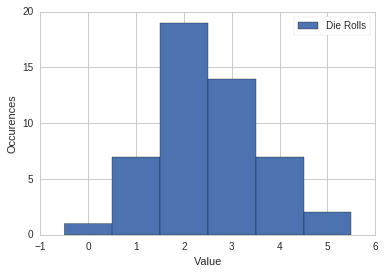

In [6]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.figure(figsize=(6,4))
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

同所有抽样情况一样，你取的样本越多，你得到的分布就越一致：

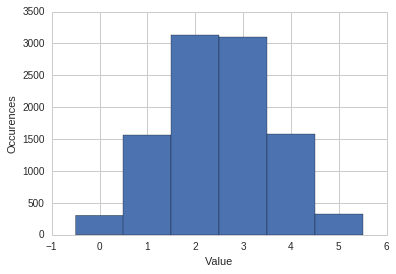

In [7]:
plt.figure(figsize=(6,4))
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

假设我们改变一下参数使 $p = 0.25$。这会使得$P(X = 0) = 0.23730$,会让我们的分布向着低值区域偏斜。我们可以很容易地从下图中看出：

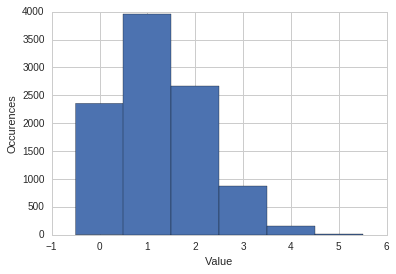

In [8]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.figure(figsize=(6,4))
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

将$p$的值从$0.50$ 改为 $0.25$，显然使我们的分布变得不对称。我们可以将股价涨跌看做二项式随机变量，并将此概念推广到我们称之为股价变化的二项式模型框架中。这是期权定价的基础之一。在二项式模型中，假设对于任意给定的时间段内，股价的涨跌变化可能视其上涨或者下跌的概率值而决定。这就把股价转化成了二项式随机变量的函数、涨跌幅度以及初始股价。我们可以改变这些参数来近似不同股票的价格分布。

## 连续型随机变量
与离散型随机变量不同之处在于，连续型随机变量能够有无穷多个结果。这意味着为这些结果单独分配一个概率毫无意义。因为存在无限的结果，命中任何一个结果的概率都是0。

取而代之的是，我们可以通过技术结果范围内的概率来解决这个问题。这是通过积分来实现的，不过为了在此使用我们的抽样技术，我们实际上并不会真正用到积分。对于连续随机变量，$P(X = 0)$是无意义的。我们将会寻求类似$P(-1 < X < 1)$的概率。对于连续型随机变量，我们定义**概率密度函数(PDF)** $f_X(x)$，而非概率质量函数PMF，这样我们就可以说：
$$P(a < X < b) = \int_a^b f_X(x)dx$$

同我们要求离散分布所有概率之和为1相类似，在这里我们要求：

1. 对于 $X$ 的所有值，$f_X(x) \geq 0$
2. $P(-\infty < X < \infty) = \int_{-\infty}^{\infty} f_X(x) dx = 1$

值得注意的是，由于连续分布上单个点的概率是$0$，所以范围中端点的概率也是$0$。因此，$P(a \leq X \leq b) = P(a < X \leq b) = P(a \leq X < B) = P(a < X < b)$。如果我们在所有可能的范围内对PDF进行求和，得到的值应该是$1$。


In [9]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

### 均匀分布

均匀分布也可以在连续型随机变量的框架内定义。我们假设$a$和$b$为常数，分别代表结果所能取到的最小值和最大值。那么均匀随机变量的概率密度函数如下：

$$f(x) = \begin{cases}
\frac{1}{b - a} & \text{for $a < x < b$} \\
0 & \text{otherwise}\end{cases}$$

由于函数是定义在连续区间，概率密度函数涵盖了（自变量，随机变量）从$a$和$b$之间的所有值，我们据此可以绘制出对应的概率密度函数如下（可以任意改变$a$和$b$的值）:

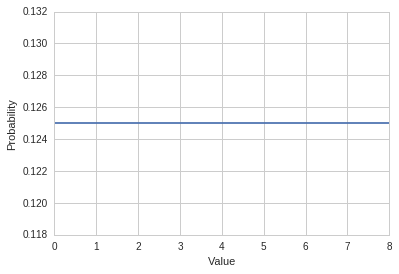

In [10]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

和之前的离散型均匀分布一样，连续型均匀分布的概率密度函数对随机变量能够取到的所有值都是一个常量。唯一的区别在于，我们不能针对任何单个点取到对应的概率。通过对概率密度函数进行积分得到累计密度函数：

$$ F(x) = \begin{cases} 0 & \text{for $x \leq a$} \\ \frac{x - a}{b - a} & \text{for $a < x < b$} \\ 1 & \text{for $x \geq b$}\end{cases}$$

与PDF在同样区间绘制的CDF如下:

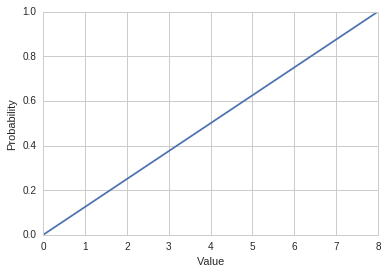

In [11]:
y = [(i - a)/(b - a) for i in x]
plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

### 正态分布
正态分布在统计学中是非常常见和重要的分布。许多统计领域乃至金融领域中重要的检验和方法，都是基于正态假设。这在很大程度上来自于中心极限定理(CLT)的结论，该定理指出，当独立试验样本足够多时，它们呈现正态分布。正态分布的便利性也体现在某些算法交易策略中。在之后的配对交易中我们会提到，我们搜寻那些协整的股票对，并基于正态分布来预测它们之间的价差变化方向。

In [12]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

当在描述一个正态随机变量的时候，我们只需要知道它的均值($\mu$)和方差($\sigma^2$, 这里 $\sigma$ 是标准差)。我们用 $X$ **~** $N(\mu, \sigma^2)$来表示随机变量$X$是一个正态随机变量。在现代投资理论中，通常假设股票收益是服从正态分布的。正太随机变量的一个主要特性在于，有两个或者更多个正态随机变量线性组合而成的变量，也是正态随机变量。这使得观察含有多只股票的投资组合的均值和方差变得很有用。到目前为止，我们仅仅只研究了单变量的概率分布。当我们想要同一时间描述多个随机变量时，比如观察多只股票的情况，我们可以研究多变量分布。多变量正态分布通过各个变量的均值、方差，以及两两变量间的显著相关性来完整描述，这在确定投资组合特性时很重要，因为投资组合的方差取决于其内部各资产的方差以及内部资产间的相关性。

正态随机变量的概率密度函数如下：

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

在定义的区间 $-\infty < x < \infty$，当均值 $\mu = 0$ 且 $\sigma = 1$时, 我们称其为标准正态分布。

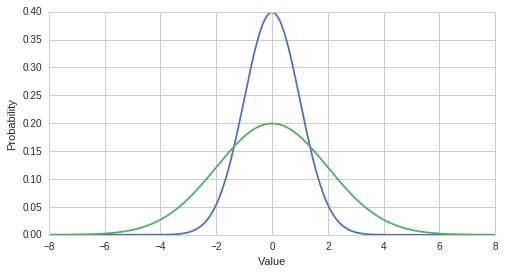

In [13]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.figure(figsize=(8,4))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');

通过改变正态分布的均值和标准差，我们可以改变钟形曲线的高度和宽度。标准差越大，分布相对于均值会更扩散（分布曲线越宽，距离均值的集中度越低）。

我们用正态分布来对股价收益进行建模，而非对股价本身来建模。这是因为股价不能小于0，而正态分布要能取到实数范围内的所有值，从这一点来说股价收益显然更适合。

对于给定正态分布的均值和方差，我们有以下结论:

* 观察结果中约有 $68\%$ 落在距离均值附近一个标准差的范围内 ($\mu \pm \sigma$)
* 观察结果中约有 $95\%$ 落在距离均值附近两个标准差的范围内 ($\mu \pm 2\sigma$)
* 观察结果中约有 $99\%$ 落在距离均值附近三个标准差的范围内 ($\mu \pm 3\sigma$)

这些值对于理解和正态分布相关的**置信区间**非常重要。当考虑样本分布的均值和方差时，我们更想观察均值周围的不同置信区间。

利用中心极限定理，我们可以对不同的随机变量进行标准化，使它们成为正态随机变量。在统计学中，一个广泛使用的工具是标准正态概率表，用来查找给定的$x$值所对应的标准正态累计密度函数值。通过将随机变量转变为标准正态变量，我们能够简单地从这些表中查找到概率值。我们通过对随机变量$X$减去其均值，再除以方差，最终将其转变为标准正态随机变量$Z$。

$$Z = \frac{X - \mu}{\sigma}$$

让我们看一个二项式随机变量$X$ **~** $B(n, p)$的例子，该随机变量的均值$\mu = np$，方差$\sigma^2 = np(1 - p)$。[具体证明戳此](https://blog.csdn.net/saltriver/article/details/52600094)

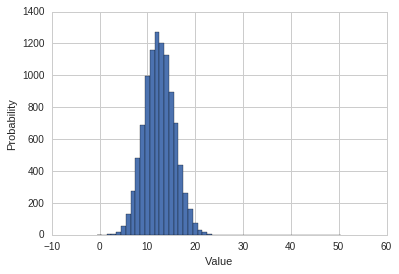

In [14]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))
plt.figure(figsize=(6,4))
plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');

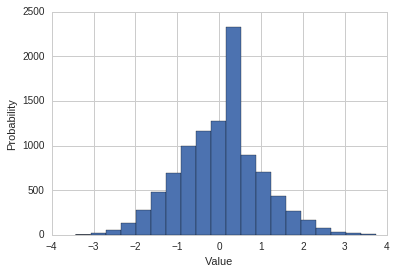

In [15]:
plt.figure(figsize=(6,4))
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');

随机变量标准化的思想是非常重要的。通过将随机变量的分布转变为我们更熟悉的标准正态分布，我们可以很容易回答原始变量的概率问题。然而，这需要足够多的样本量。让我们假设股票收益是正态分布的，用$Y$表示股票价格。我们将模拟它的收益并将其绘制出来。

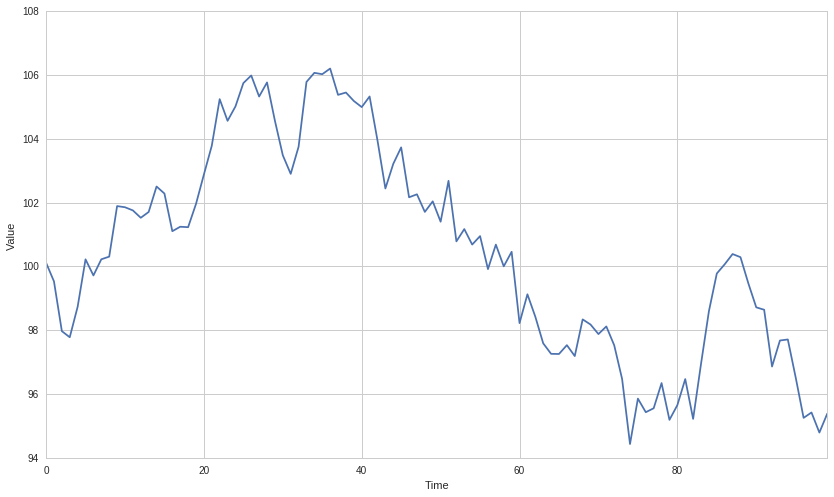

In [19]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

再假设我们有一只其他的股票 $Z$，同样我们将模拟 $Z$ 的收益并绘制出来。

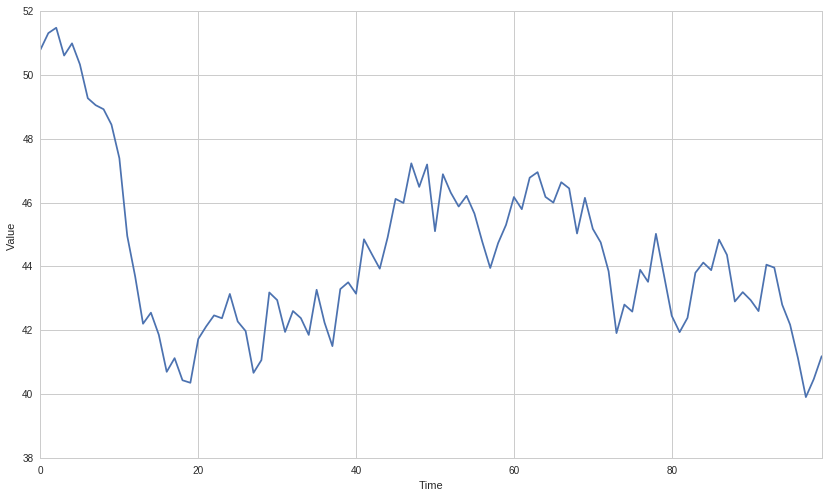

In [24]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

我们通过基于对 $Y$ 和 $Z$ 持股数量进行加权平均，购进出投资组合 $W$

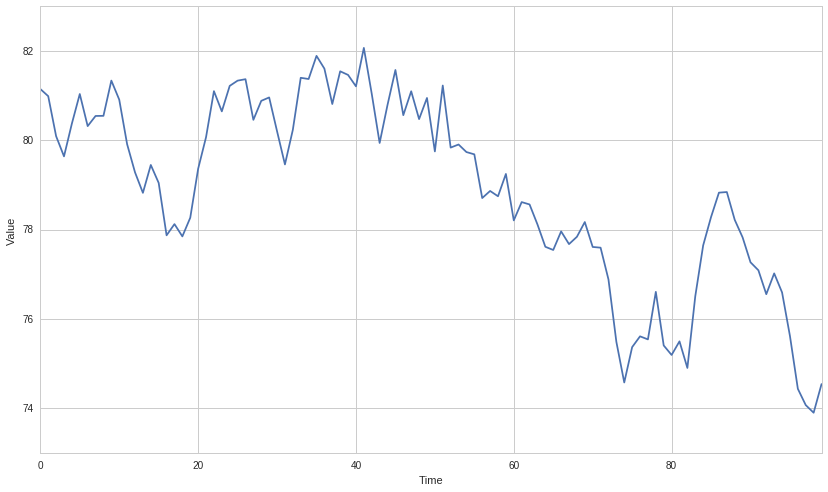

In [26]:
Y_quantity = 80
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

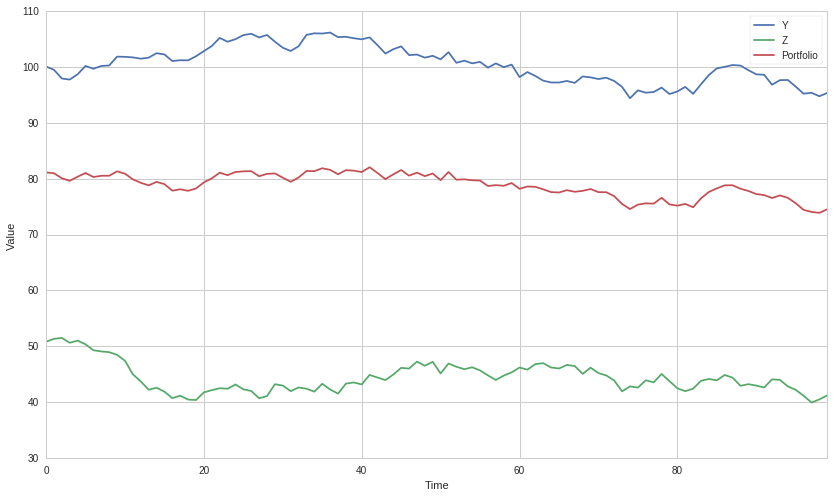

In [27]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

注意我们的投资组合 $W$ 的收益也是正态分布的。

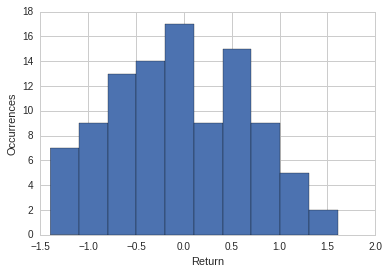

In [28]:
plt.figure(figsize=(6,4))
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');

正态分布被广泛应用于金融领域，尤其是风险和投资组合理论之中。已有大量的文献介绍关于如何将正态分布应用于风险分析以及股价建模。

## 拟合分布

现在我们将尝试将概率分布拟合到股票的收益。我们取特斯拉的股收益，并试图用正态分布对其进行拟合。实现需要检查收益是否实际符合正态分布的性质。为此我们使用Jarque-Bera检验，即如果p值低于临界值，则不具备正态性。

In [29]:
start = '2015-01-01'
end = '2016-01-01'
prices = get_pricing('TSLA', fields=['price'], start_date=start, end_date=end)

P值:  [  4.42333138e-12]
拒绝收益是正态分布的假设  [ True]
偏度:  [ 0.21123495]
封度:  [ 5.19572153]


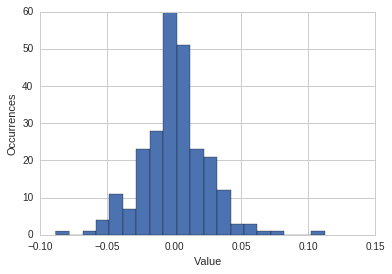

In [33]:
# Take the daily returns
returns = prices.pct_change()[1:]

#Set a cutoff
cutoff = 0.01

# Get the p-value of the Jarque-Bera test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print "P值: ", p_value
print "拒绝收益是正态分布的假设 ", p_value < cutoff
print "偏度: ", skewness
print "封度: ", kurtosis
plt.figure(figsize=(6,4))
plt.hist(returns.price, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

Jarque-Bera检验出来的的低p值导致我们拒绝收益是正态分布的虚无假设。这是由于收益分布呈现出高峰值（正态分布的峰值为3）

这里我们先假设收益是正态分布的，这样我们就能进行拟合分布。下面我们计算出序列的样本均值与标准差

In [23]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns.price)
sample_std_dev = np.std(returns.price)

现在让我们来看一下理论上的正态曲线如何与实际相匹配

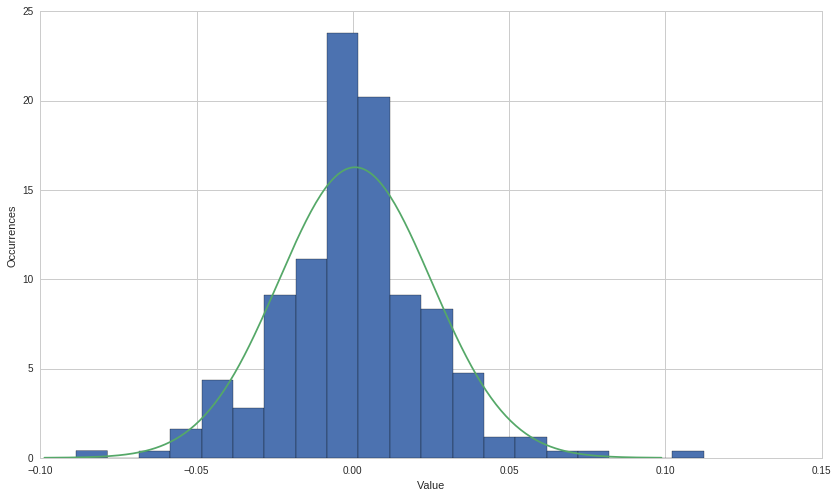

In [24]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns.price, bins = 20, normed = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');

我们理论上的收益曲线和实际情况相比，有一个更低的峰值，这不难理解，由于收益实际上并不符合正态分布。实际分布的峰度在5.2附近，与此同时正态分布的峰度是3。更高的峰度导致了更高的峰值。未知的概率分布是造成对价格和收益建模困难的一个主要原因。许多金融理论和框架都要求数据在某种程度上与正态分布相关。这也是正态分布如此普遍的一个原因。例如，Black-Scholes期权定价模型是基于股价呈现对数正态分布的假设。然而，现实中去寻找那些完美符合正态假设的数据极为困难。事实上在策略实现中，除非有特殊需要，否则你不应该假设数据服从它明显不遵循的分布。

通常，当对真实值拟合概率分布时，我们应该在脑中预设了一个（或几个）特定的分布，并对不同的分布做大量的检验，以确定哪种分布是拟合最好的。除此之外，随着更多的数据信息被获取，更新样本均值和标准差，甚至于寻找不同的分布来准确反映新的数据信息都将是必要的。分布的形状也将相应改变。